#### Step-1 Data Cleaning and Preprocessing

1. update the column name Name to college Name

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;


In [42]:
df = pd.read_csv('nirf_university_rankings.csv');
df

,Institute ID,Name,City,State,Score,Rank
0,IR-O-U-0220,"Indian Institute of Science, BengaluruMore Det...",Bengaluru,Karnataka,83.29,1
1,IR-O-U-0109,Jawaharlal Nehru UniversityMore Details | |,New Delhi,Delhi,69.80,2
2,IR-O-U-0108,Jamia Millia IslamiaMore Details | |,New Delhi,Delhi,68.11,3
3,IR-O-U-0234,"Manipal Academy of Higher Education, ManipalMo...",Manipal,Karnataka,67.18,4
4,IR-O-U-0500,Banaras Hindu UniversityMore Details | |,Varanasi,Uttar Pradesh,66.05,5
...,...,...,...,...,...,...
95,IR-O-U-0489,Vel Tech Rangarajan Dr. Sagunthala R & D Insti...,Chennai,Tamil Nadu,46.22,96
96,IR-O-U-0524,University of LucknowMore Details | |,Lucknow,Uttar Pradesh,45.89,97
97,IR-O-U-0444,Avinashilingam Institute for Home Science and ...,Coimbatore,Tamil Nadu,45.78,98
98,IR-O-U-0449,Central University of Tamil NaduMore Details | |,Tiruvarur,Tamil Nadu,45.73,99


In [43]:
df.rename(columns={'Name':'College Name'},inplace=True);
df

,Institute ID,College Name,City,State,Score,Rank
0,IR-O-U-0220,"Indian Institute of Science, BengaluruMore Det...",Bengaluru,Karnataka,83.29,1
1,IR-O-U-0109,Jawaharlal Nehru UniversityMore Details | |,New Delhi,Delhi,69.80,2
2,IR-O-U-0108,Jamia Millia IslamiaMore Details | |,New Delhi,Delhi,68.11,3
3,IR-O-U-0234,"Manipal Academy of Higher Education, ManipalMo...",Manipal,Karnataka,67.18,4
4,IR-O-U-0500,Banaras Hindu UniversityMore Details | |,Varanasi,Uttar Pradesh,66.05,5
...,...,...,...,...,...,...
95,IR-O-U-0489,Vel Tech Rangarajan Dr. Sagunthala R & D Insti...,Chennai,Tamil Nadu,46.22,96
96,IR-O-U-0524,University of LucknowMore Details | |,Lucknow,Uttar Pradesh,45.89,97
97,IR-O-U-0444,Avinashilingam Institute for Home Science and ...,Coimbatore,Tamil Nadu,45.78,98
98,IR-O-U-0449,Central University of Tamil NaduMore Details | |,Tiruvarur,Tamil Nadu,45.73,99


2. Standardize state names

In [44]:
def stdStateName(state):
    return state[0].upper()+state[1:];

def stdCityName(city):
    return city[0].upper()+city[1:];

df['State'] = df['State'].transform(stdStateName);
df['City'] = df['City'].transform(stdCityName);


df

,Institute ID,College Name,City,State,Score,Rank
0,IR-O-U-0220,"Indian Institute of Science, BengaluruMore Det...",Bengaluru,Karnataka,83.29,1
1,IR-O-U-0109,Jawaharlal Nehru UniversityMore Details | |,New Delhi,Delhi,69.80,2
2,IR-O-U-0108,Jamia Millia IslamiaMore Details | |,New Delhi,Delhi,68.11,3
3,IR-O-U-0234,"Manipal Academy of Higher Education, ManipalMo...",Manipal,Karnataka,67.18,4
4,IR-O-U-0500,Banaras Hindu UniversityMore Details | |,Varanasi,Uttar Pradesh,66.05,5
...,...,...,...,...,...,...
95,IR-O-U-0489,Vel Tech Rangarajan Dr. Sagunthala R & D Insti...,Chennai,Tamil Nadu,46.22,96
96,IR-O-U-0524,University of LucknowMore Details | |,Lucknow,Uttar Pradesh,45.89,97
97,IR-O-U-0444,Avinashilingam Institute for Home Science and ...,Coimbatore,Tamil Nadu,45.78,98
98,IR-O-U-0449,Central University of Tamil NaduMore Details | |,Tiruvarur,Tamil Nadu,45.73,99


3. Remove unwanted text

In [46]:
def RemoveUnwantedText(text):
    pos = -1;
    for i in range (len(text)):
        if text[i] == '|':
            pos = i;
            break;
    return text[:pos-2];

df['College Name'] = df['College Name'].transform(RemoveUnwantedText);

df


,Institute ID,College Name,City,State,Score,Rank
0,IR-O-U-0220,"Indian Institute of Science, Bengaluru",Bengaluru,Karnataka,83.29,1
1,IR-O-U-0109,Jawaharlal Nehru University,New Delhi,Delhi,69.80,2
2,IR-O-U-0108,Jamia Millia Islamia,New Delhi,Delhi,68.11,3
3,IR-O-U-0234,"Manipal Academy of Higher Education, Manipal",Manipal,Karnataka,67.18,4
4,IR-O-U-0500,Banaras Hindu University,Varanasi,Uttar Pradesh,66.05,5
...,...,...,...,...,...,...
95,IR-O-U-0489,Vel Tech Rangarajan Dr. Sagunthala R & D Insti...,Chennai,Tamil Nadu,46.22,96
96,IR-O-U-0524,University of Lucknow,Lucknow,Uttar Pradesh,45.89,97
97,IR-O-U-0444,Avinashilingam Institute for Home Science and ...,Coimbatore,Tamil Nadu,45.78,98
98,IR-O-U-0449,Central University of Tamil Nadu,Tiruvarur,Tamil Nadu,45.73,99


4. delete duplicate college name


In [49]:
df.drop_duplicates(subset='College Name',inplace=True);
print(df);

   Institute ID                                       College Name  \
0   IR-O-U-0220             Indian Institute of Science, Bengaluru   
1   IR-O-U-0109                        Jawaharlal Nehru University   
2   IR-O-U-0108                               Jamia Millia Islamia   
3   IR-O-U-0234       Manipal Academy of Higher Education, Manipal   
4   IR-O-U-0500                           Banaras Hindu University   
..          ...                                                ...   
95  IR-O-U-0489  Vel Tech Rangarajan Dr. Sagunthala R & D Insti...   
96  IR-O-U-0524                              University of Lucknow   
97  IR-O-U-0444  Avinashilingam Institute for Home Science and ...   
98  IR-O-U-0449                   Central University of Tamil Nadu   
99  IR-O-C-6379      Netaji Subhas University of Technology (NSUT)   

          City          State  Score  Rank  
0    Bengaluru      Karnataka  83.29     1  
1    New Delhi          Delhi  69.80     2  
2    New Delhi          

5. Filter out low score Data


In [50]:
df1 = df[df['Score'] > 60];
print(df1);

   Institute ID                                       College Name  \
0   IR-O-U-0220             Indian Institute of Science, Bengaluru   
1   IR-O-U-0109                        Jawaharlal Nehru University   
2   IR-O-U-0108                               Jamia Millia Islamia   
3   IR-O-U-0234       Manipal Academy of Higher Education, Manipal   
4   IR-O-U-0500                           Banaras Hindu University   
5   IR-O-U-0120                                University of Delhi   
6   IR-O-U-0436                         Amrita Vishwa Vidyapeetham   
7   IR-O-U-0496                          Aligarh Muslim University   
8   IR-O-U-0575                                Jadavpur University   
9   IR-O-U-0490                    Vellore Institute of Technology   
10  IR-O-I-1441  Saveetha Institute of Medical and Technical Sc...   
11  IR-O-U-0473         S.R.M. Institute of Science and Technology   
12  IR-O-U-0439                                    Anna University   
13  IR-O-U-0363     

### step-2 Data Analysis

In [58]:
## 1. Top 5 institutes in Karnataka

Karnatake_institute = df[df['State'] == 'Karnataka'];

Top5 = Karnatake_institute.head();

Collegename = Top5[['College Name','Score']];

print(Collegename);

                                    College Name  Score
0         Indian Institute of Science, Bengaluru  83.29
3   Manipal Academy of Higher Education, Manipal  67.18
23  JSS Academy of Higher Education and Research  57.74
53                             Mysore University  51.04
59                             Christ University  49.87


In [61]:
## 2. Average Score per State


Avg_score = df.groupby(['State'])['Score'].mean();

print(Avg_score);

State
Andhra Pradesh       52.162000
Assam                51.935000
Chandigarh           55.110000
Delhi                57.878571
Gujarat              48.040000
Haryana              47.565000
Himachal Pradesh     48.820000
Jammu and Kashmir    53.380000
Jharkhand            47.310000
Karnataka            54.215455
Kerala               54.060000
Maharashtra          54.208000
Mizoram              48.030000
Odisha               62.570000
Pondicherry          49.140000
Punjab               52.057143
Rajasthan            52.970000
Tamil Nadu           54.052727
Telangana            55.063333
Uttar Pradesh        53.754444
Uttarakhand          50.890000
West Bengal          63.245000
Name: Score, dtype: float64


In [ ]:
##3. state with the most institute

Inst_count = df.groupby(['State'])['State'].count()
State_Name = Inst_count.idxmax()
Max_Count = Inst_count.max()

print(f"State Name: {State_Name}, Institute Count: {Max_Count}")

# print(Inst_count)

State Name: Tamil Nadu, Institute Count: 22


In [78]:
## 4. Median rank per state

Inst_Median = df.groupby(['State'])['Rank'].median()
print("median rank per state ",Inst_Median);


median rank per state  State
Andhra Pradesh       59.0
Assam                54.5
Chandigarh           38.0
Delhi                40.0
Gujarat              76.0
Haryana              81.5
Himachal Pradesh     70.0
Jammu and Kashmir    47.5
Jharkhand            82.0
Karnataka            65.0
Kerala               35.5
Maharashtra          43.0
Mizoram              77.0
Odisha               14.5
Pondicherry          68.0
Punjab               57.0
Rajasthan            64.0
Tamil Nadu           49.0
Telangana            43.0
Uttar Pradesh        53.0
Uttarakhand          52.0
West Bengal          13.5
Name: Rank, dtype: float64


In [86]:
## 5.Best Institute per state 

# print(df);

best_institute_per_state = df.loc[df.groupby("State")["Score"].idxmax(), ["State", "College Name", "City", "Score", "Rank"]]



print("Best institute with max score ",best_institute_per_state);

Best institute with max score                  State                                       College Name  \
21     Andhra Pradesh  Koneru Lakshmaiah Education Foundation Univers...   
39              Assam                                 Gauhati University   
37         Chandigarh                                  Panjab University   
1               Delhi                        Jawaharlal Nehru University   
75            Gujarat                                 Gujarat University   
70            Haryana  Maharishi Markandeshwar (Deemed to be University)   
69   Himachal Pradesh  Shoolini University of Biotechnology and Manag...   
44  Jammu and Kashmir                              University of Kashmir   
81          Jharkhand                      Birla Institute of Technology   
0           Karnataka             Indian Institute of Science, Bengaluru   
20             Kerala                                  Kerala University   
15        Maharashtra                     Homi Bhabha Nat

In [ ]:
## 6.each state find minimum and maximum score

#  each state i have all the score find the max and min score 

StAndSc = df[['State','Score']]

groupby = df.groupby('State')['Score'].agg({'max','min'});

print("the group by",groupby);


# print(StAndSc);

the group by                      min    max
State                          
Andhra Pradesh     46.65  57.98
Assam              49.01  54.86
Chandigarh         55.11  55.11
Delhi              45.51  69.80
Gujarat            48.04  48.04
Haryana            46.46  48.67
Himachal Pradesh   48.82  48.82
Jammu and Kashmir  52.33  54.43
Jharkhand          47.31  47.31
Karnataka          46.31  83.29
Kerala             46.63  58.48
Maharashtra        47.94  62.31
Mizoram            48.03  48.03
Odisha             62.53  62.61
Pondicherry        49.14  49.14
Punjab             46.47  59.96
Rajasthan          49.38  60.03
Tamil Nadu         45.73  65.73
Telangana          48.32  62.18
Uttar Pradesh      45.89  66.05
Uttarakhand        46.64  54.02
West Bengal        61.10  65.39


In [118]:
### Ranking and comparison 

# 1. Rank difference analysis ( create column showing difference between each institute rank and the avg rank of its state)

# print(df);

df['Avg_Rank_State'] = df.groupby('State')['Rank'].transform('mean');

df['Rank_Difference'] = abs(df['Avg_Rank_State'] - df['Rank']);

print(df);





   Institute ID                                       College Name  \
0   IR-O-U-0220             Indian Institute of Science, Bengaluru   
1   IR-O-U-0109                        Jawaharlal Nehru University   
2   IR-O-U-0108                               Jamia Millia Islamia   
3   IR-O-U-0234       Manipal Academy of Higher Education, Manipal   
4   IR-O-U-0500                           Banaras Hindu University   
..          ...                                                ...   
95  IR-O-U-0489  Vel Tech Rangarajan Dr. Sagunthala R & D Insti...   
96  IR-O-U-0524                              University of Lucknow   
97  IR-O-U-0444  Avinashilingam Institute for Home Science and ...   
98  IR-O-U-0449                   Central University of Tamil Nadu   
99  IR-O-C-6379      Netaji Subhas University of Technology (NSUT)   

          City          State  Score  Rank  Avg_Rank_State  Rank_Difference  
0    Bengaluru      Karnataka  83.29     1       55.909091        54.909091  
1  

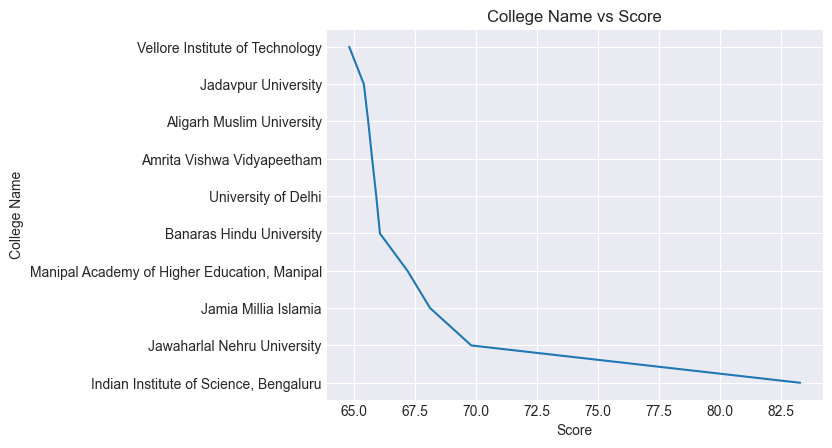

In [134]:
## 2. Top 10 institute plt institute vs score

Top_10 = df.head(10);

y = Top_10['College Name'];
x = Top_10['Score'];

plt.plot(x,y)
plt.title("College Name vs Score");
plt.xlabel("Score");
plt.ylabel("College Name");



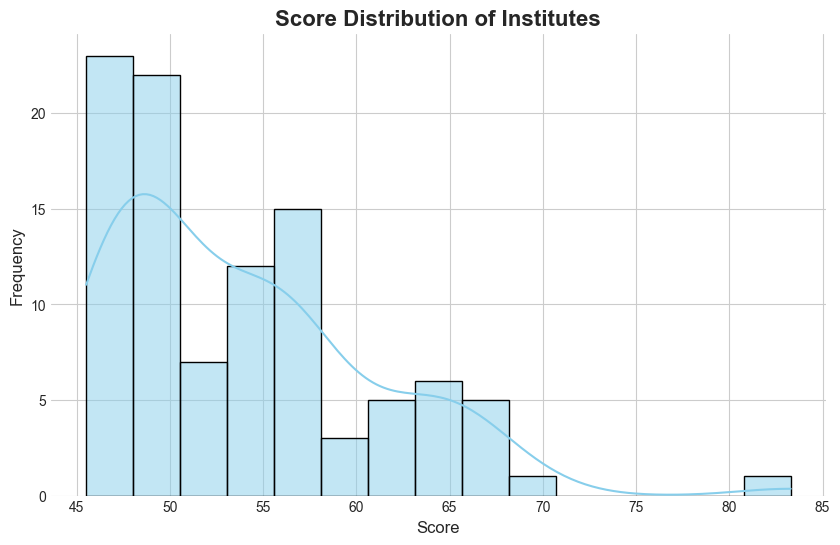

In [ ]:
# 2. Score distribution

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(df["Score"], bins=15, kde=True, color="skyblue", edgecolor="black") # kernal density estimate (kde)

plt.title("Score Distribution of Institutes", fontsize=16, fontweight='bold')
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

In [143]:
## Filtering and Conditional Logic 

# 1. institute in metro cities

ans = df[(df['City'] == 'Bengaluru') | (df['City'] == 'Delhi') | (df['City'] == 'Mumbai') | (df['City'] == 'Chennai')]

print(ans);

   Institute ID                                       College Name       City  \
0   IR-O-U-0220             Indian Institute of Science, Bengaluru  Bengaluru   
5   IR-O-U-0120                                University of Delhi      Delhi   
10  IR-O-I-1441  Saveetha Institute of Medical and Technical Sc...    Chennai   
11  IR-O-U-0473         S.R.M. Institute of Science and Technology    Chennai   
12  IR-O-U-0439                                    Anna University    Chennai   
15  IR-O-U-0304                     Homi Bhabha National Institute     Mumbai   
34  IR-O-U-0308                   Institute of Chemical Technology     Mumbai   
38  IR-O-I-1357                               University of Madras    Chennai   
48    IR-O-N-10  SVKM`s Narsee Monjee Institute of Management S...     Mumbai   
50  IR-O-U-0474     Sathyabama Institute of Science and Technology    Chennai   
54  IR-O-I-1486  Sri Ramachandra Institute of Higher Education ...    Chennai   
57  IR-O-U-0331             

In [149]:
# 2. High-score institutes outside top 10

ans = df[(df['Score'] > 60) & (df['Rank'] > 9)];

print(ans);

   Institute ID                                       College Name  \
9   IR-O-U-0490                    Vellore Institute of Technology   
10  IR-O-I-1441  Saveetha Institute of Medical and Technical Sc...   
11  IR-O-U-0473         S.R.M. Institute of Science and Technology   
12  IR-O-U-0439                                    Anna University   
13  IR-O-U-0363                              Siksha `O` Anusandhan   
14  IR-O-U-0356         Kalinga Institute of Industrial Technology   
15  IR-O-U-0304                     Homi Bhabha National Institute   
16  IR-O-U-0042                            University of Hyderabad   
17  IR-O-U-0570                                Calcutta University   
18  IR-O-U-0391  Birla Institute of Technology and Science, Pilani   

           City        State  Score  Rank  Avg_Rank_State  Rank_Difference  
9       Vellore   Tamil Nadu  64.79    10       50.272727        40.272727  
10      Chennai   Tamil Nadu  64.62    11       50.272727        39.272727 

In [152]:
# 3. Multi-condition filtering

ans = df[((df['State'] == 'Tamil Nadu') & ((df['Score'] > 50) & (df['Score'] < 60))) | ((df['State'] == 'Karnataka') & ((df['Score'] > 50) & (df['Score'] < 60)))];
print(ans);


   Institute ID                                       College Name  \
23  IR-O-U-0222       JSS Academy of Higher Education and Research   
25  IR-O-U-0447                              Bharathiar University   
27  IR-O-U-0476  Shanmugha Arts Science Technology and Research...   
29  IR-O-U-0458     Kalasalingam Academy of Research and Education   
35  IR-O-U-0448                           Bharathidasan University   
38  IR-O-I-1357                               University of Madras   
46  IR-O-U-0435                                Alagappa University   
50  IR-O-U-0474     Sathyabama Institute of Science and Technology   
53  IR-O-U-0235                                  Mysore University   
54  IR-O-I-1486  Sri Ramachandra Institute of Higher Education ...   
55  IR-O-U-0470                                 Periyar University   

               City       State  Score  Rank  Avg_Rank_State  Rank_Difference  
23           Mysuru   Karnataka  57.74    24       55.909091        31.909091  

Correlation between Score and Rank: -0.9355


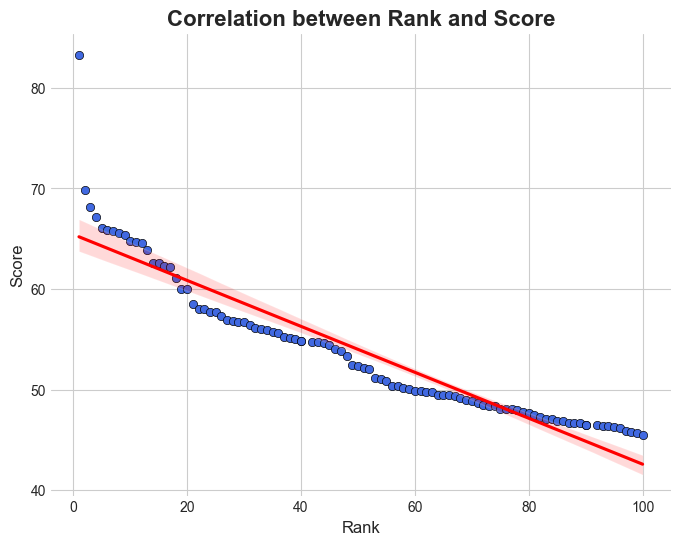

In [155]:
## Advanced Analysis

# 1. Correlation check

correlation_value = df["Score"].corr(df["Rank"])
print(f"Correlation between Score and Rank: {correlation_value:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Rank", y="Score", data=df, color="royalblue", edgecolor="black")

sns.regplot(x="Rank", y="Score", data=df, scatter=False, color="red")

plt.title("Correlation between Rank and Score", fontsize=16, fontweight="bold")
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.grid(True)
plt.show()
